Question 1:

Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1.fitting it to the periodic function
2.plot the fit

Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

Solution:

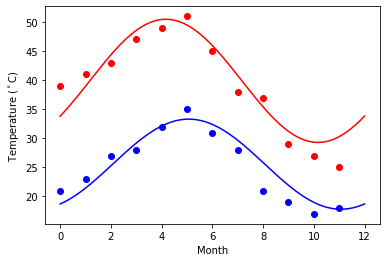

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Maximum and Minimum temperature of a city in India for each month in  a year
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

months = np.arange(12)
#fitting  it to a periodic function
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      Max)
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      Min)

#plotting the fit
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, Max,'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, Min,'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

Question 2:
    
Matplotlib:

    This assignment is for visualization using matplotlib:
data to use:

    url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

        titanic = pd.read_csv(url)

Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender




In [3]:
import pandas as pd

#Reading the titanic dataset url

url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'

titanic = pd.read_csv(url)

Solution 1:Create a pie chart presenting the male/female proportion

In [4]:
#getting the size of gender
t=titanic.groupby(["sex"]).size()
t

sex
female    466
male      843
dtype: int64

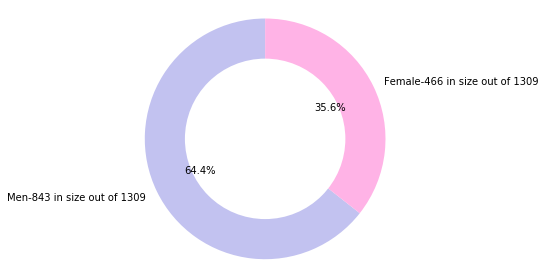

In [5]:
#creating pie chart for gender proportions
sizes_gender =[843,466]
labels=['Men'+'-'+str(sizes_gender[0])+' in size out of 1309','Female'+'-'+str(sizes_gender[1])+' in size out of 1309']
colors_gender = ['#c2c2f0','#ffb3e6']
plt.pie(sizes_gender,labels=labels,colors=colors_gender,radius=0.75,autopct='%1.1f%%',startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()

Solution 2: Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

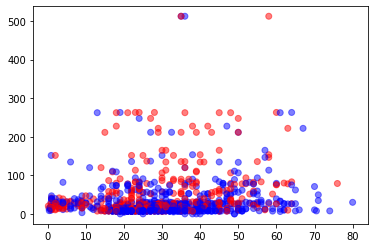

In [6]:
#Method 1
#Creating a scatterplot with the Fare paid and the Age, differ the plot color by gender
titanic = titanic.dropna(subset=['sex'])

mapping = {'male' : 'blue', 'female' : 'red'}
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, c=titanic['sex'].map(mapping))
plt.show()



<Figure size 432x288 with 0 Axes>

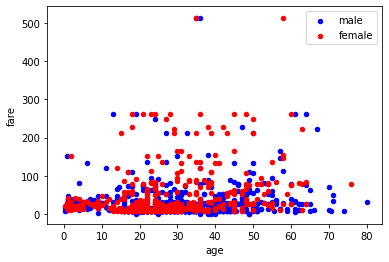

In [7]:
#method 2
plt.figure()
category1 = titanic[titanic.sex=='male'].plot.scatter('age', 'fare', color='blue',label='male') 
titanic[titanic.sex=='female'].plot.scatter('age', 'fare',color='red',label='female',ax=category1)